In [1]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import squarify
from datetime import datetime

In [3]:
data = pd.read_csv('OnlineRetail.csv', encoding='ISO-8859-1')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='mixed')

In [8]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom


Handle 135080 missing Customer ID: treat as Unknown Customers

In [5]:
data['CustomerID'].fillna('Unknown', inplace=True)
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom


In [6]:
print('Transactions timefreame from {} to {}'.format(data['InvoiceDate'].min(), data['InvoiceDate'].max()))
print('{:,} transactions don\'t have a customer id'.format(data[data.CustomerID.isnull()].shape[0]))
print('{:,} unique customer id'.format(len(data.CustomerID.unique())))

Transactions timefreame from 2010-01-12 08:26:00 to 2011-12-10 17:19:00
0 transactions don't have a customer id
4,373 unique customer id


## RFM

In [7]:
max_date = data['InvoiceDate'].max().date()

In [8]:
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

In [9]:
Recency = lambda x: (max_date - x.max().date()).days
Frequency = lambda x: len(x.unique())
Monetary = lambda x: round(sum(x),2)

In [10]:
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': Recency,
    'InvoiceNo': Frequency,
    'TotalPrice': Monetary
}).rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalPrice': 'Monetary'})

In [11]:
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,2,0.00
12347.0,40,7,4310.00
12348.0,76,4,1797.24
12349.0,19,1,1757.55
12350.0,311,1,334.40


In [12]:
rfm = rfm.sort_values('Monetary', ascending=False)
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
Unknown,0,3710,1447682.12
14646.0,2,77,279489.02
18102.0,12,62,256438.49
17450.0,3,55,187482.17
14911.0,0,248,132572.62


In [13]:
rfm.shape

(4373, 3)

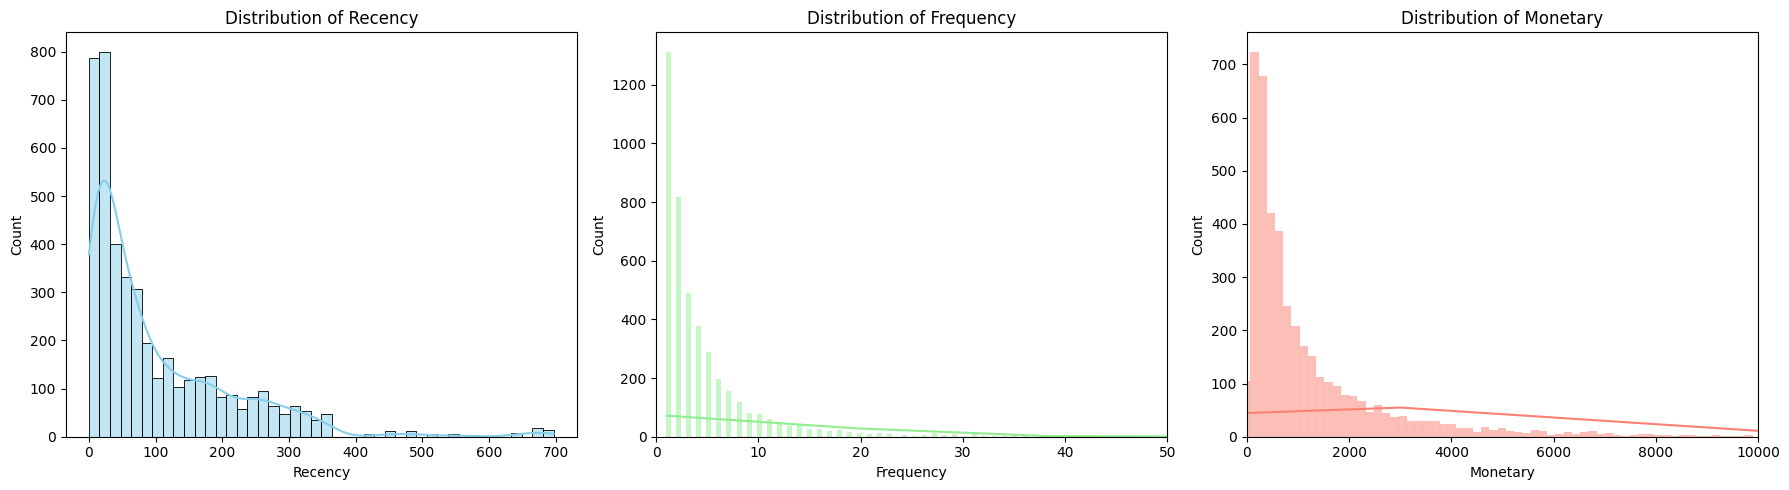

In [14]:
plt.figure(figsize=(18, 5))

# Recency distribution
plt.subplot(1, 3, 1)
sns.histplot(rfm['Recency'], kde=True, color='skyblue')
plt.title('Distribution of Recency')

# Frequency distribution
plt.subplot(1, 3, 2)
sns.histplot(rfm['Frequency'], kde=True, color='lightgreen')
plt.title('Distribution of Frequency')
plt.xlim(0, 50) 

# Monetary distribution
plt.subplot(1, 3, 3)
sns.histplot(rfm['Monetary'], kde=True, color='salmon')
plt.title('Distribution of Monetary')
plt.xlim(0, 10000)  

plt.tight_layout()
plt.show()


Recency, Frequency, Monetary: right skew\
Recency Distribution: Hầu hết khách hàng đã mua hàng tương đối gần đây, với mức cao nhất cho thấy một lượng lớn khách hàng đã mua hàng trong vòng 1-2 tháng gần đây.\
Frequency Distribution: Hầu hết khách hàng có tần suất mua hàng thấp và giảm đáng kể khi tần suất mua hàng tăng lên. \
Monetary Distribution: Phân phối lệch sang phải, cho thấy mức chi tiêu cao ít phổ biến hơn, hầu hết khách hàng chi tiêu số tiền nhỏ hơn.


In [15]:
r_labels = range(4,0,-1)
f_labels = range(1,5)
m_labels = range(1,5)

In [16]:
[*r_labels]

[4, 3, 2, 1]

In [17]:
r_groups = pd.qcut(rfm['Recency'].rank(method='first'), q=4, labels=r_labels)
f_groups = pd.qcut(rfm['Frequency'].rank(method='first'), q=4, labels=f_labels)
m_groups = pd.qcut(rfm['Monetary'].rank(method='first'), q=4, labels=m_labels)

In [18]:
rfm = rfm.assign(R = r_groups.values, F = f_groups.values, M = m_groups.values)

In [19]:
rfm.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
Unknown,0,3710,1447682.12,4,4,4
14646.0,2,77,279489.02,4,4,4
18102.0,12,62,256438.49,4,4,4
17450.0,3,55,187482.17,4,4,4
14911.0,0,248,132572.62,4,4,4


In [20]:
rfm['RFM_Score'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)

In [21]:
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Score
CustomerID,,,,,,,
Unknown,0,3710,1447682.12,4,4,4,444
14646.0,2,77,279489.02,4,4,4,444
18102.0,12,62,256438.49,4,4,4,444
17450.0,3,55,187482.17,4,4,4,444
14911.0,0,248,132572.62,4,4,4,444


In [22]:
unique_segments_count = rfm['RFM_Score'].nunique()
unique_segments_count


63

### Manual Segmentation

In [23]:
def assign_segment(row):
    if row['R'] >= 3 and row['F'] >= 3 and row['M'] >= 3:
        return 'Top Customers'
    elif row['F'] >= 3:
        return 'Loyal Customers'
    elif row['M'] >= 3:
        return 'Big Spenders'
    elif row['R'] == 1 or row['R'] == 2:
        return 'At Risk'
    else:
        return 'Lost/Inactive'

# Applying the function to the RFM DataFrame
rfm['Segment'] = rfm.apply(assign_segment, axis=1)

# Counting the number of customers in each segment
segment_counts = rfm['Segment'].value_counts()

# Displaying the counts of customers in each segment
segment_counts

Segment
Top Customers      1337
At Risk            1277
Loyal Customers     849
Lost/Inactive       506
Big Spenders        404
Name: count, dtype: int64

Calculate mean values for each segment

In [25]:
rfm_agg = rfm.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean','count']}).round(0)

rfm_agg.columns = rfm_agg.columns.droplevel()
rfm_agg.columns = ['R_Mean','F_Mean','M_Mean','Count']
rfm_agg['Percent'] = round(rfm_agg['Count']/rfm_agg.Count.sum()*100,2)

rfm_agg = rfm_agg.reset_index()

rfm_agg

,Segment,R_Mean,F_Mean,M_Mean,Count,Percent
0,At Risk,214.0,1.0,261.0,1277,29.20
1,Big Spenders,108.0,2.0,1375.0,404,9.24
2,Lost/Inactive,29.0,1.0,295.0,506,11.57
3,Loyal Customers,98.0,5.0,1231.0,849,19.41
4,Top Customers,20.0,14.0,5733.0,1337,30.57


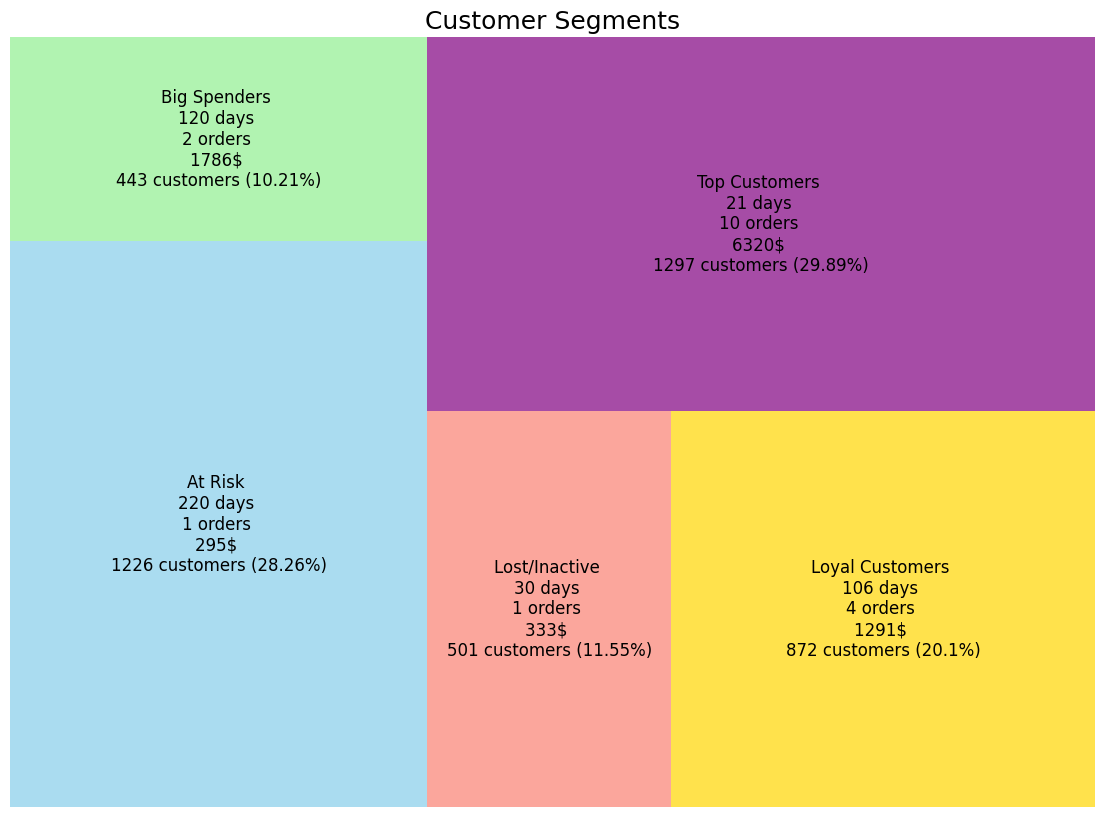

In [30]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(14,10)

sizes = rfm_agg['Count']
colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'purple']

# Plotting the treemap
# plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, color=colors,
              label= ['{} \n{:.0f} days \n{:.0f} orders \n{:.0f}$ \n{:.0f} customers ({}%)'.format(*rfm_agg.iloc[i]) for i in range (0, len(rfm_agg))],
              alpha=0.7, text_kwargs={'fontsize':12})

plt.title('Customer Segments', fontsize=18)
plt.axis('off')  # Removes the axis to display only the treemap
plt.show()


In [31]:
fig = px.scatter(rfm_agg, x='R_Mean', y ='M_Mean', size='F_Mean', color='Segment', hover_name='Segment', size_max=100)
fig.show()

### Top Customers:
Những khách hàng này là những người mua thường xuyên, mới mua gần đây và chi tiêu một số tiền đáng kể. 
Chiến lược: tập trung vào việc giữ chân, upsell và cross-sell. Các ưu đãi độc quyền, khả năng tiếp cận sớm các sản phẩm mới và các chương trình khách hàng thân thiết
### Loyal Customers:
Tần suất mua hàng cao và mức chi tiêu của đáng kể nhưng không phải là cao nhất. 
Chiến lược: Khuyến khích những khách hàng này tăng chi tiêu bằng cách cá nhân hóa và các ưu đãi theo gói, duy trì sự gắn kết\
### Big Spenders
Những khách hàng này chi tiêu rất nhiều khi mua hàng nhưng họ có thể không thực hiện việc này thường xuyên hoặc gần đây. 
Chiến lược: Thu hút lại những khách hàng này bằng hoạt động tiếp thị được cá nhân hóa, tập trung vào các mặt hàng có giá trị cao phù hợp với lịch sử mua hàng của họ.
### At Risk
Khách hàng đã lâu không mua nhưng họ đã thường xuyên mua sắm hoặc chi tiêu nhiều. 
Chiến lược: triển khai các chiến dịch thu hút lại bằng các ưu đãi đặc biệt hoặc lời nhắc nhở về những gì họ đang thiếu. Khảo sát để hiểu lý do tại sao họ ko thường xuyên mua nữa.
### Lost/Inactive
Nhóm KH đã không mua hàng trong một thời gian dài, không mua hàng thường xuyên và chi tiêu rất ít.
Chiến lược: Xem xét các chiến dịch  với các ưu đãi hoặc cập nhật sản phẩm hấp dẫn có thể khiến họ quan tâm dựa trên hành vi trước đây của họ. Tuy nhiên, ưu tiên tập trung nguồn lực trên các phân khúc có khả năng tạo giá trị cao hơn, đặc biệt là Top Customers.


In [86]:
df_new['Cluster']= model2.labels_
df_new.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':['mean','count']
}).round(2)

C:\Users\Asus\AppData\Local\Temp\ipykernel_2864\36626697.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Recency Frequency    Monetary      
           mean      mean        mean count
Cluster                                    
0        101.12      4.96     1650.70  4366
1          0.00   3710.00  1447682.12     1
2          7.00     89.00   182181.98     6

In [38]:
def predict_rfm_segment(R, F, M):
    # Applying the same criteria used for manual segmentation
    R_Score = None
    F_Score = None
    M_Score = None

    # Assuming quartile boundaries based on previous analysis (for illustration)
    R_Quartiles = [30, 60, 90]  # Example quartile boundaries for Recency
    F_Quartiles = [2, 5, 8]     # Example quartile boundaries for Frequency
    M_Quartiles = [500, 1000, 1500]  # Example quartile boundaries for Monetary

    R_Score = 4 - sum(R > q for q in R_Quartiles)
    F_Score = 1 + sum(F > q for q in F_Quartiles)
    M_Score = 1 + sum(M > q for q in M_Quartiles)

    # Segment assignment logic
    if R_Score >= 3 and F_Score >= 3 and M_Score >= 3:
        return 'Top Customers'
    elif F_Score >= 3:
        return 'Loyal Customers'
    elif M_Score >= 3:
        return 'Big Spenders'
    elif R_Score == 1 or R_Score == 2:
        return 'At Risk'
    else:
        return 'Lost/Inactive'

In [26]:
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Score,Segment
CustomerID,,,,,,,,
Unknown,0,3710,1447682.12,4,4,4,444,Top Customers
14646.0,2,77,279489.02,4,4,4,444,Top Customers
18102.0,12,62,256438.49,4,4,4,444,Top Customers
17450.0,3,55,187482.17,4,4,4,444,Top Customers
14911.0,0,248,132572.62,4,4,4,444,Top Customers


In [39]:
# Save model
import pickle
filename = 'segment_predictor.pkl'

# Save the model to a file using pickle
with open(filename, 'wb') as file:
    pickle.dump(predict_rfm_segment, file)

In [42]:
# Loading the function
with open('segment_predictor.pkl', 'rb') as f:
    loaded_predictor = pickle.load(f)


r_input = int(input("Please enter the Recency of customer: "))
f_input = int(input("Please enter the Frequency of customer: "))
m_input = int(input("Please enter the Monetary of customer: "))
# Example usage
segment = loaded_predictor(R=r_input, F=f_input, M=m_input)  # Example R, F, M values
print(f"Predicted segment: {segment}")

Predicted segment: Loyal Customers


In [36]:
rfm.to_csv('rfm2.csv', index=True)

In [44]:
def get_customer_segment(customer_id, filename='rfm2.csv'):
    """
    Retrieve the customer segment for a given customer ID from a CSV file.
    
    Parameters:
    - customer_id: The customer ID to look up
    - filename: The name of the CSV file containing segmentation results
    
    Returns:
    - The customer's segment if found, otherwise a message indicating not found
    """
    try:
        # Load the segmentation results
        segments_df = pd.read_csv(filename)
        
        # Ensure 'CustomerID' is treated as a string to match input type
        segments_df['CustomerID'] = segments_df['CustomerID'].astype(str)
        
        # Find the segment for the given customer ID
        segment = segments_df.loc[segments_df['CustomerID'] == str(customer_id), 'Segment']
        if not segment.empty:
            return segment.iloc[0]
        else:
            return "Customer ID not found."
    except FileNotFoundError:
        return "Segmentation file not found. Please ensure the file exists."


In [ ]:
import pickle
filename = 'customer_segment.pkl'

# Save the model to a file using pickle
with open(filename, 'wb') as file:
    pickle.dump(get_customer_segment, file)

In [45]:
customer_id = input("Please enter the customer_id: ")
segment = get_customer_segment(customer_id)
print(f"The segment for Customer ID {customer_id} is: {segment}")

The segment for Customer ID 16029 is: Top Customers
